In [3]:
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps['App'].count())

# Print a concise summary of apps dataframe
print(apps.info())

# Have a look at a random sample of n rows
n = 5
apps.sample(n=5)

Total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6738,7797,Chest Tracker for Clash Royale,TOOLS,4.3,77717,14.0,"5,000,000+",Free,0,Everyone,Tools,"December 29, 2016",1.2.0,4.1 and up
6547,7603,Glitch Fixers: Powerpuff Girls,GAME,4.4,39698,51.0,"5,000,000+",Free,0,Everyone,Arcade,"December 1, 2016",1.0.0,4.1 and up
2508,3235,Google Translate,TOOLS,4.4,5745093,NaN,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device
7253,8337,DF-View,BUSINESS,NaN,0,15.0,100+,Free,0,Everyone,Business,"January 4, 2016",1.0.9,4.0 and up
6654,7713,Sporting CP Keyboard Theme,SPORTS,NaN,45,5.3,"5,000+",Free,0,Everyone,Sports,"October 24, 2017",1,4.0 and up


In [5]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs','Price']
# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    #apps[cols_to_clean].replace(chars_to_remove,'')
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18740\528073279.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps[col] = apps[col].astype(str).str.replace(char, '')


In [4]:
correct_apps_with_duplicates = pd.read_csv('datasets/apps.csv')

def test_pandas_loaded():
    assert ('pd' in globals()), "pandas is not imported and aliased as specified in the instructions."

def test_apps_with_duplicates_loaded():
#     correct_apps_with_duplicates = pd.read_csv('datasets/apps.csv')
    assert (correct_apps_with_duplicates.equals(apps_with_duplicates)), "The data was not correctly read into apps_with_duplicates."
    
def test_duplicates_dropped():
#     correct_apps_with_duplicates = pd.read_csv('datasets/apps.csv')
    correct_apps = correct_apps_with_duplicates.drop_duplicates()
    assert (correct_apps.equals(apps)), "The duplicates were not correctly dropped from apps_with_duplicates."
    
def test_total_apps():
    correct_total_apps = len(correct_apps_with_duplicates.drop_duplicates())
    assert (correct_total_apps == len(apps)), "The total number of apps is incorrect. It should equal 9659."
    

In [6]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ['Installs','Price']
# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    #apps[cols_to_clean].replace(chars_to_remove,'')
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 
    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18740\3188509255.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps[col] = apps[col].astype(str).str.replace(char, '')


In [7]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)
#print(num_apps_in_category)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


In [8]:
# last_value = _
# print(type(last_value))

def test_num_categories():
    assert num_categories == 33, "The number of app categories is incorrect. It should equal 33."
    
def test_num_apps_in_category():
    correct_num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)
    assert (correct_num_apps_in_category == num_apps_in_category).all(), "num_apps_in_category is not what we expected. Please inspect the hint."

In [9]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)


Average app rating =  4.173243045387998


In [10]:
def test_app_avg_rating():
    assert round(avg_app_rating, 5) == 4.17324, \
    "The average app rating rounded to five digits should be 4.17324."
    
# def test_x_histogram():
#     correct_x_histogram = apps['Rating']
#     assert correct_x_histogram.all() == data[0]['x'].all(), \
#     'x should equal Rating column'

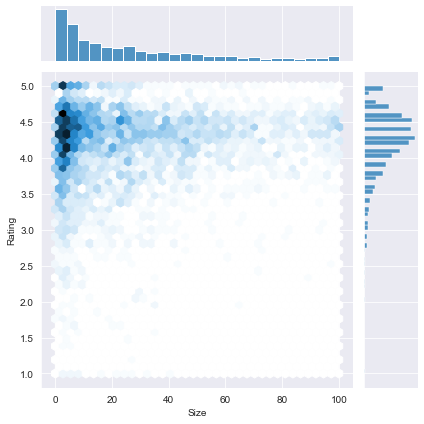

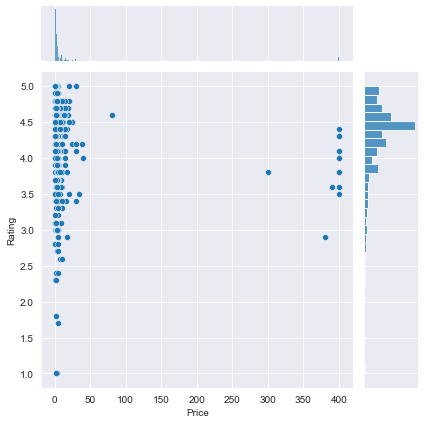

In [11]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

In [12]:
correct_apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]
 
def test_apps_with_size_and_rating_present():
    global correct_apps_with_size_and_rating_present
    assert correct_apps_with_size_and_rating_present.equals(apps_with_size_and_rating_present)
    "The correct_apps_with_size_and_rating_present is not what we expected. Please review the instructions and check the hint if necessary."
    
def test_large_categories():
    global correct_apps_with_size_and_rating_present
    correct_large_categories = correct_apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250).reset_index()
    assert correct_large_categories.equals(large_categories), \
    "The large_categories DataFrame is not what we expected. Please review the instructions and check the hint if necessary."

def test_size_vs_rating():
    global correct_apps_with_size_and_rating_present
    correct_large_categories = correct_apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()
#     correct_large_categories = correct_large_categories[correct_large_categories['Size'].notnull()]
#     correct_large_categories = correct_large_categories[correct_large_categories['Rating'].notnull()]
    assert plt1.x.tolist() == large_categories['Size'].values.tolist() and plt1.y.tolist() == large_categories['Rating'].values.tolist(), \
    "The size vs. rating jointplot is not what we expected. Please review the instructions and check the hint if necessary."
    
def test_paid_apps():
    global correct_apps_with_size_and_rating_present
    correct_paid_apps = correct_apps_with_size_and_rating_present[correct_apps_with_size_and_rating_present['Type'] == 'Paid']
    assert correct_paid_apps.equals(paid_apps), \
    "The paid_apps DataFrame is not what we expected. Please review the instructions and check the hint if necessary."
    
def test_price_vs_rating():
    global correct_apps_with_size_and_rating_present
    correct_paid_apps = correct_apps_with_size_and_rating_present[correct_apps_with_size_and_rating_present['Type'] == 'Paid']
#     correct_paid_apps = correct_paid_apps[correct_paid_apps['Price'].notnull()]
#     correct_paid_apps = correct_paid_apps[correct_paid_apps['Rating'].notnull()]
    assert plt2.x.tolist() == correct_paid_apps['Price'].values.tolist() and plt2.y.tolist() == correct_paid_apps['Rating'].values.tolist(), \
    "The price vs. rating jointplot is not what we expected. Please review the instructions and check the hint if necessary."

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


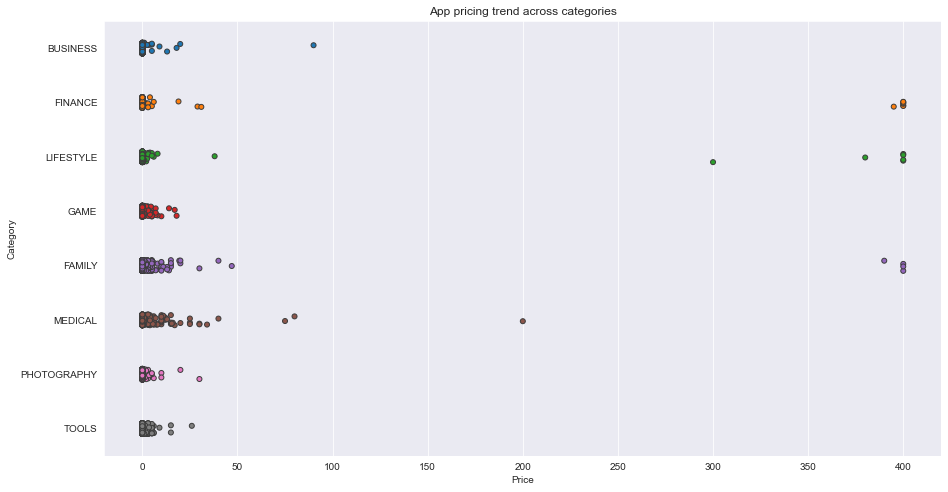

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

In [14]:
last_output = _

def test_apps_above_200():
    assert len(apps_above_200) == 17, "There should be 17 apps priced above 200 in apps_above_200."

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

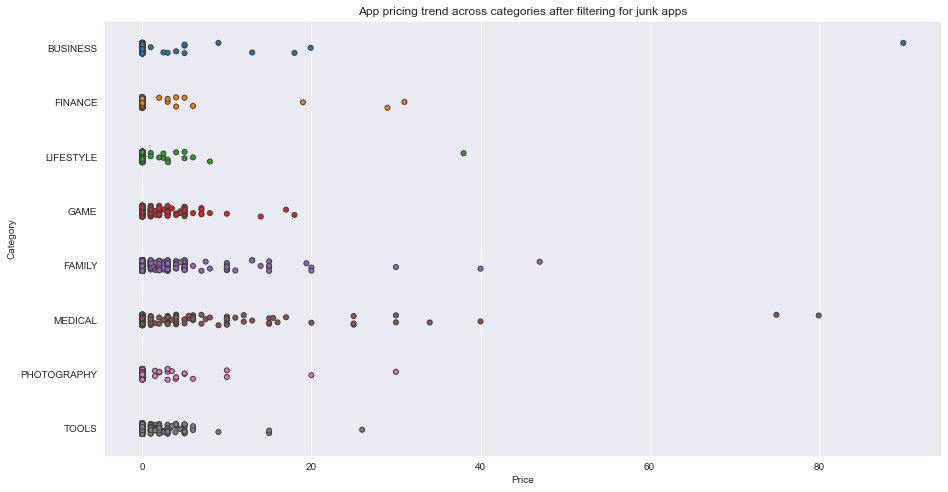

In [15]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [16]:
apps

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
def test_apps_under_100():
    correct_apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]
    assert correct_apps_under_100.equals(apps_under_100), \
    "The apps_under_100 DataFrame is not what we expected. Please review the instructions and check the hint if necessary."

In [18]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] =='Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [19]:
def test_trace0_y():
    correct_y = apps['Installs'][apps['Type'] == 'Paid']
    assert all(trace0['y'] == correct_y.values), \
    "The y data for trace0 appears incorrect. Please review the instructions and check the hint if necessary."

def test_trace1_y():
    correct_y_1 = apps['Installs'][apps['Type'] == 'Free']
    correct_y_2 = apps['Installs'][apps['Price'] == 0]
    try:
        check_1 = all(trace1['y'] == correct_y_1.values)
    except:
        check_1 = False
    try:
        check_2 = all(trace1['y'] == correct_y_2.values)
    except:
        check_2 = False
        
    assert check_1 or check_2, \
    "The y data for trace1 appears incorrect. Please review the instructions and check the hint if necessary."

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

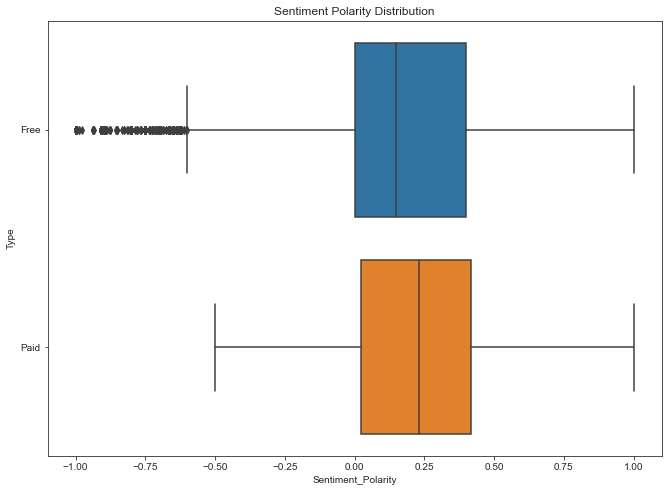

In [20]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x ='Sentiment_Polarity', y ='Type', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
